In [45]:
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn; assert sklearn.__version__ >= "0.20"


import numpy as np
import tensorflow as tf
from tensorflow import keras

In [46]:
fichero = "C:\\Users\\daniel.martinezcarre\\Desktop\\Repositorios\\ia_repositorio\\Sistemas de Aprendizaxe Automático\\archivos\\winequality-red.csv"
datos = pd.read_csv(fichero)

In [47]:
from sklearn.model_selection import train_test_split

X, y = datos.drop('quality', axis=1), datos['quality']
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)


Escalado de los valores de X:

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val =   scaler.transform(X_val)
X_test =  scaler.transform(X_test)

Semilla:

In [49]:
np.random.seed(42)
tf.random.set_seed(42)

In [50]:
X_train.shape

(899, 11)

### Creación de la red neuronal

In [51]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(11,)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1)
])

In [52]:
model.compile(loss="mean_squared_error",
              optimizer= keras.optimizers.SGD(learning_rate=0.001))

### Resumen del modelo

In [53]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento del modelo

In [54]:
model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28.1824 - val_loss: 20.6316
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.6601 - val_loss: 14.1556
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.5718 - val_loss: 9.7423
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.3588 - val_loss: 6.9513
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.6582 - val_loss: 5.3079
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0305 - val_loss: 4.3371
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0514 - val_loss: 3.7264
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4264 - val_loss: 3.3031
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9980 - val_loss: 2.9839
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.6843 - val_loss: 2.7263
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4405 - val_loss: 2.5110
Epoch 12/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2422 - val_loss: 2.

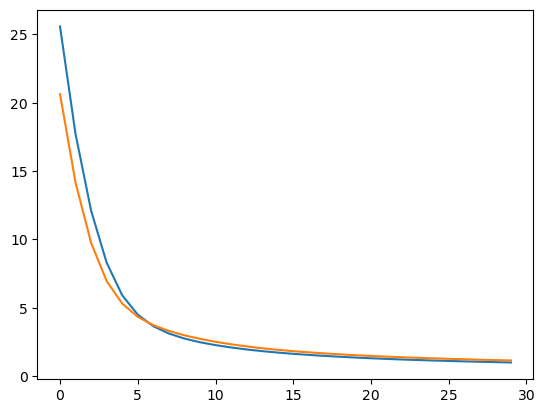

In [55]:
plt.plot(pd.DataFrame(model.history.history))

### Evaluación del modelo

In [56]:
mse_test = model.evaluate(X_test, y_test)
mse_test

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - loss: 0.9922


1.010492205619812

### Guardado del modelo

In [57]:
# model.save("red_vino.keras")